<a href="https://colab.research.google.com/github/A-Ighalo/Fraud-Detection-in-Unlabeled-Transaction-Data/blob/main/Fraud_Detection_in_Unlabeled_Transaction_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Fraud Detection in Unlabeled Transaction Data**

---
**Author:** Abraham Ighalo - Data Engineering & Analytics

**Executive Summary**

This project develops a comprehensive anomaly detection framework for identifying fraudulent patterns in loyalty program transactions using unsupervised machine learning techniques. By analyzing unlabeled transaction data, the system automatically flags suspicious activities that could indicate fraud, abuse, or system manipulation without requiring pre-classified training examples.

**Problem Statement**

Loyalty and promotional systems are increasingly vulnerable to sophisticated fraud schemes including account takeovers, point farming, and coordinated abuse patterns. Traditional rule-based detection methods fail to identify novel attack vectors, while supervised approaches require extensive labeled fraud examples that are costly and time-intensive to obtain.


## **Install necessary libraries**

In [ ]:
# Run if you get the error 'No module named 'polars'
#!pip install dask "dask[distributed]" polars

In [ ]:
import pandas as pd
import numpy as np
#import dask.dataframe as dd
import polars as pl
import seaborn as sns
from scipy import stats
import plotly.express as px
from dask.distributed import Client, print
import matplotlib.pyplot as plt

np.set_printoptions(threshold = 100000)

## **Data 1**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import random
random.seed(42)

df = pl.read_csv(f"/content/drive/MyDrive/data/2019-Oct_2.csv")

In [ ]:
df

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
str,str,i64,i64,str,str,f64,i64,str
"""2019-10-10 16:42:06 UTC""","""view""",43600025,2102305967893905931,null,"""sony""",141.32,512682492,"""744e1990-27ba-477a-9189-e01eaf…"
"""2019-10-24 10:29:55 UTC""","""view""",1004767,2053013555631882655,"""electronics.smartphone""","""samsung""",246.52,551416853,"""0267b49d-40fe-40f2-9f7e-588527…"
"""2019-10-25 03:27:45 UTC""","""view""",3900702,2053013552326770905,"""appliances.environment.water_h…","""thermex""",115.75,514602640,"""cb676021-0f7f-4caa-b8ce-8ecf09…"
"""2019-10-06 17:19:52 UTC""","""view""",1005014,2053013555631882655,"""electronics.smartphone""","""samsung""",603.36,513405318,"""1405e13f-cc6e-4f36-84f9-e1dc71…"
"""2019-10-28 15:45:03 UTC""","""view""",14701260,2053013557133443581,"""furniture.living_room.cabinet""",null,167.06,515927387,"""698f6a3d-1d48-467b-8a66-8711ac…"
…,…,…,…,…,…,…,…,…
"""2019-10-02 19:48:08 UTC""","""view""",1306310,2053013558920217191,"""computers.notebook""","""apple""",1352.67,526099981,"""1a41e178-f99f-4994-9619-b480a1…"
"""2019-10-29 17:08:43 UTC""","""cart""",1004566,2053013555631882655,"""electronics.smartphone""","""huawei""",164.98,513466652,"""9e8a5874-784f-4244-a87b-be994a…"
"""2019-10-17 18:43:30 UTC""","""view""",28719519,2053013565782098913,"""apparel.shoes""","""respect""",82.63,517575605,"""c2984b72-6240-4497-89e6-22bfe4…"


In [ ]:
print(df)

shape: (5_000, 9)
┌────────────┬────────────┬────────────┬───────────┬───┬─────────┬─────────┬───────────┬───────────┐
│ event_time ┆ event_type ┆ product_id ┆ category_ ┆ … ┆ brand   ┆ price   ┆ user_id   ┆ user_sess │
│ ---        ┆ ---        ┆ ---        ┆ id        ┆   ┆ ---     ┆ ---     ┆ ---       ┆ ion       │
│ str        ┆ str        ┆ i64        ┆ ---       ┆   ┆ str     ┆ f64     ┆ i64       ┆ ---       │
│            ┆            ┆            ┆ i64       ┆   ┆         ┆         ┆           ┆ str       │
╞════════════╪════════════╪════════════╪═══════════╪═══╪═════════╪═════════╪═══════════╪═══════════╡
│ 2019-10-10 ┆ view       ┆ 43600025   ┆ 210230596 ┆ … ┆ sony    ┆ 141.32  ┆ 512682492 ┆ 744e1990- │
│ 16:42:06   ┆            ┆            ┆ 789390593 ┆   ┆         ┆         ┆           ┆ 27ba-477a │
│ UTC        ┆            ┆            ┆ 1         ┆   ┆         ┆         ┆           ┆ -9189-e01 │
│            ┆            ┆            ┆           ┆   ┆         ┆       

## **Evaluatory Data Analysis**

In [ ]:
df.schema

Schema([('event_time', String),
        ('event_type', String),
        ('product_id', Int64),
        ('category_id', Int64),
        ('category_code', String),
        ('brand', String),
        ('price', Float64),
        ('user_id', Int64),
        ('user_session', String)])

In [ ]:
df.select(pl.col("*").is_null().sum())

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,1605,742,0,0,0


In [ ]:
df['price'].describe()

statistic,value
str,f64
"""count""",5000.0
"""null_count""",0.0
"""mean""",293.985534
"""std""",361.60437
"""min""",0.0
"""25%""",66.9
"""50%""",160.55
"""75%""",360.34
"""max""",2573.81


In [ ]:
print(df.describe())

shape: (9, 10)
┌────────────┬────────────┬────────────┬───────────┬───┬───────┬───────────┬───────────┬───────────┐
│ statistic  ┆ event_time ┆ event_type ┆ product_i ┆ … ┆ brand ┆ price     ┆ user_id   ┆ user_sess │
│ ---        ┆ ---        ┆ ---        ┆ d         ┆   ┆ ---   ┆ ---       ┆ ---       ┆ ion       │
│ str        ┆ str        ┆ str        ┆ ---       ┆   ┆ str   ┆ f64       ┆ f64       ┆ ---       │
│            ┆            ┆            ┆ f64       ┆   ┆       ┆           ┆           ┆ str       │
╞════════════╪════════════╪════════════╪═══════════╪═══╪═══════╪═══════════╪═══════════╪═══════════╡
│ count      ┆ 5000       ┆ 5000       ┆ 5000.0    ┆ … ┆ 4258  ┆ 5000.0    ┆ 5000.0    ┆ 5000      │
│ null_count ┆ 0          ┆ 0          ┆ 0.0       ┆ … ┆ 742   ┆ 0.0       ┆ 0.0       ┆ 0         │
│ mean       ┆ null       ┆ null       ┆ 1.0727e7  ┆ … ┆ null  ┆ 293.98553 ┆ 5.3300e8  ┆ null      │
│            ┆            ┆            ┆           ┆   ┆       ┆ 4         ┆

Here we can see that the data is skewed

# **Statistical Methods**


## **Zscore**   
 $z = \frac{x - \mu}{\sigma}$

Zscore refers to the distribution of the data on the distribution graph. It is determined by the mean and standard deviation as such more sensitive to skewed data


In [ ]:
zscore_threshold = 2.5

price_rate = df['price'].mean()
stvdev_price_rate = df['price'].std(ddof = 0)

print('Mean price rate is {:.2f}'.format(price_rate))
print('Standard deviation is {:.2f}'.format(stvdev_price_rate))

df_new = df.with_columns( zscore = (df['price'] - price_rate)/stvdev_price_rate)

anomalies = df_new.filter(pl.col("zscore") > zscore_threshold)


Mean price rate is 293.99
Standard deviation is 361.57


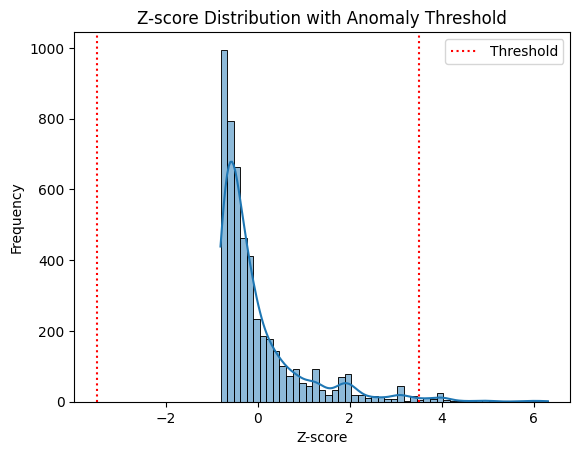

In [ ]:
threshold = 3.5
anomalies = df_new.filter((pl.col("zscore") > threshold) | (pl.col("zscore") < -threshold))

sns.histplot(df_new['zscore'], bins=50, kde=True)
plt.axvline(threshold, color='r', linestyle=':', label='Threshold')
plt.axvline(-threshold, color='r', linestyle=':')
plt.title("Z-score Distribution with Anomaly Threshold")
plt.xlabel("Z-score")
plt.ylabel("Frequency")
plt.legend()
plt.show()


 # **Modified Zscore**
$y_{i} = (x_{i} - \tilde X)/(k*{\rm MAD})$

Modified Zscore is more flexible with skewed data as it uses the median distribution of data

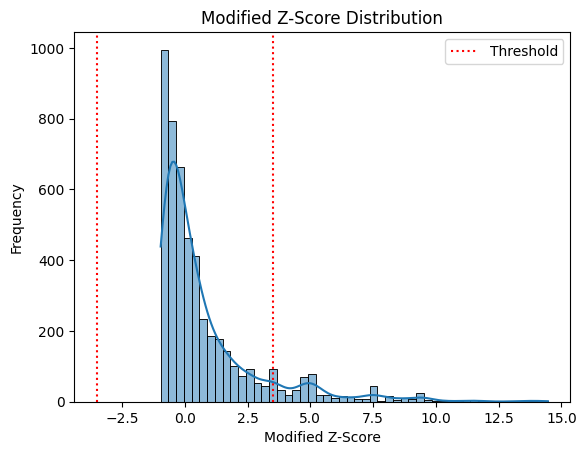

In [ ]:
median_price = df.select(pl.col("price").median()).item()
mad_price = df.select((pl.col("price") - median_price).abs().median()).item()

df_mod = df.with_columns([
    ((pl.col("price") - median_price) / mad_price * 0.6745).alias("modified_zscore")
])

threshold_mod = 3.5
anomalies_mod = df_mod.filter(pl.col("modified_zscore").abs() > threshold_mod)

sns.histplot(df_mod["modified_zscore"], bins=50, kde=True)
plt.axvline(threshold_mod, color='red', linestyle=':', label='Threshold')
plt.axvline(-threshold_mod, color='red', linestyle=':')
plt.title("Modified Z-Score Distribution")
plt.xlabel("Modified Z-Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()


# **Machine learning Methods**



---
**Algorithms**

**#isolation forest**

**#lower Outlier factor**

**#one-class svm**

**#dbscan**

**#Convolutional Autoencoder  - future**  

**#Variational Autoencoder  - future**

**Isolation forest**

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score
from matplotlib import cm

In [ ]:

df.head(10)

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
str,str,i64,i64,str,str,f64,i64,str
"""2019-10-10 16:42:06 UTC""","""view""",43600025,2102305967893905931,null,"""sony""",141.32,512682492,"""744e1990-27ba-477a-9189-e01eaf…"
"""2019-10-24 10:29:55 UTC""","""view""",1004767,2053013555631882655,"""electronics.smartphone""","""samsung""",246.52,551416853,"""0267b49d-40fe-40f2-9f7e-588527…"
"""2019-10-25 03:27:45 UTC""","""view""",3900702,2053013552326770905,"""appliances.environment.water_h…","""thermex""",115.75,514602640,"""cb676021-0f7f-4caa-b8ce-8ecf09…"
"""2019-10-06 17:19:52 UTC""","""view""",1005014,2053013555631882655,"""electronics.smartphone""","""samsung""",603.36,513405318,"""1405e13f-cc6e-4f36-84f9-e1dc71…"
"""2019-10-28 15:45:03 UTC""","""view""",14701260,2053013557133443581,"""furniture.living_room.cabinet""",null,167.06,515927387,"""698f6a3d-1d48-467b-8a66-8711ac…"
"""2019-10-27 14:58:17 UTC""","""view""",1005100,2053013555631882655,"""electronics.smartphone""","""samsung""",140.5,515856779,"""348ef044-d3c6-4b76-a6d9-d24342…"
"""2019-10-25 14:16:19 UTC""","""view""",22700852,2053013556168753601,null,null,98.73,513128743,"""7de2b847-4a92-4fd4-af4b-ebd125…"
"""2019-10-17 18:10:50 UTC""","""view""",12718062,2053013553559896355,null,null,32.43,559454994,"""8918c9a3-63fa-41b5-b09f-ba9693…"
"""2019-10-16 08:03:53 UTC""","""view""",28718994,2053013565639492569,"""apparel.shoes""","""baden""",120.72,554605825,"""9ce6f370-ab9e-4824-9da3-82e283…"


In [ ]:
'''
Isolation forest: this is an un supervised machine learning algorithm that works on the basis that anomalies are rare and distinct making it easier to isolate from the rest of the data.
This algorithm unlike other algorithms that focus on identifying the normal points, focuses on the identifying and isolating the anomalities.

note -1 is an anomaly and 1 means normal
'''

model = IsolationForest(n_estimators = 100, contamination=0.1)
model.fit(df[['price']])

IsolationForest(contamination=0.1)

In [ ]:
df_new = df.with_columns(price_anomalies = model.predict(df[['price']]))
df_anomalies = df_new.filter(pl.col('price_anomalies') == -1)

In [ ]:
df_anomalies

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,price_anomalies
str,str,i64,i64,str,str,f64,i64,str,i64
"""2019-10-28 14:31:30 UTC""","""view""",1004361,2053013555631882655,"""electronics.smartphone""","""apple""",1232.95,516345452,"""8f362efb-43f5-4976-a63a-f41b42…",-1
"""2019-10-28 00:16:18 UTC""","""view""",26300200,2053013563584283495,null,"""lucente""",677.75,517976502,"""8d4fb992-0859-4afa-b4f5-7369a3…",-1
"""2019-10-19 10:03:41 UTC""","""view""",12202483,2116907525235277959,"""sport.bicycle""","""eltreco""",656.39,561860205,"""b7667d50-f21f-436a-a7c2-ad3322…",-1
"""2019-10-27 05:18:38 UTC""","""view""",1306535,2053013558920217191,"""computers.notebook""","""xiaomi""",939.28,512995786,"""d41d5462-d3f2-45c8-be32-a3aa22…",-1
"""2019-10-02 05:28:01 UTC""","""view""",1005118,2053013555631882655,"""electronics.smartphone""","""apple""",975.57,524130430,"""61672408-05a5-4c12-9c98-440738…",-1
…,…,…,…,…,…,…,…,…,…
"""2019-10-17 08:59:41 UTC""","""view""",1005105,2053013555631882655,"""electronics.smartphone""","""apple""",1420.55,552691550,"""e4748641-c62a-49da-8e9f-020241…",-1
"""2019-10-30 05:18:54 UTC""","""view""",1004237,2053013555631882655,"""electronics.smartphone""","""apple""",1093.82,560123527,"""a55c52e4-30a2-4258-ada4-65bab1…",-1
"""2019-10-27 18:11:59 UTC""","""view""",1306910,2053013558920217191,"""computers.notebook""","""msi""",1286.78,513076981,"""fc31ca70-247b-45d8-ac89-29f10e…",-1


In [ ]:
df_pandas = df_new.to_pandas()
fig = px.scatter(df_pandas, x=df_pandas.index, y='price', color='price_anomalies',title='Price with Anomaly Detection')
fig.show()

fig = px.histogram(df_pandas, x='price', color='price_anomalies',title='Price Distribution with Anomalies')
fig.show()

**Isolation  forest**

In [ ]:
df

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
str,str,i64,i64,str,str,f64,i64,str
"""2019-10-10 16:42:06 UTC""","""view""",43600025,2102305967893905931,null,"""sony""",141.32,512682492,"""744e1990-27ba-477a-9189-e01eaf…"
"""2019-10-24 10:29:55 UTC""","""view""",1004767,2053013555631882655,"""electronics.smartphone""","""samsung""",246.52,551416853,"""0267b49d-40fe-40f2-9f7e-588527…"
"""2019-10-25 03:27:45 UTC""","""view""",3900702,2053013552326770905,"""appliances.environment.water_h…","""thermex""",115.75,514602640,"""cb676021-0f7f-4caa-b8ce-8ecf09…"
"""2019-10-06 17:19:52 UTC""","""view""",1005014,2053013555631882655,"""electronics.smartphone""","""samsung""",603.36,513405318,"""1405e13f-cc6e-4f36-84f9-e1dc71…"
"""2019-10-28 15:45:03 UTC""","""view""",14701260,2053013557133443581,"""furniture.living_room.cabinet""",null,167.06,515927387,"""698f6a3d-1d48-467b-8a66-8711ac…"
…,…,…,…,…,…,…,…,…
"""2019-10-02 19:48:08 UTC""","""view""",1306310,2053013558920217191,"""computers.notebook""","""apple""",1352.67,526099981,"""1a41e178-f99f-4994-9619-b480a1…"
"""2019-10-29 17:08:43 UTC""","""cart""",1004566,2053013555631882655,"""electronics.smartphone""","""huawei""",164.98,513466652,"""9e8a5874-784f-4244-a87b-be994a…"
"""2019-10-17 18:43:30 UTC""","""view""",28719519,2053013565782098913,"""apparel.shoes""","""respect""",82.63,517575605,"""c2984b72-6240-4497-89e6-22bfe4…"


**Data Preprocessing / Feature Engineering**

In [ ]:
df = df.with_columns(
    event_time = pl.col('event_time').str.to_datetime("%Y-%m-%d %H:%M:%S",strict = False),
    #hour=pl.col("event_time").dt.hour(),
    #day=pl.col("event_time").dt.day(),
    #weekday=pl.col("event_time").dt.weekday()
)

le_event = LabelEncoder()
le_brand = LabelEncoder()

df = df.with_columns(
    event_type_encoded=le_event.fit_transform(df["event_type"].to_numpy()),
    brand_encoded=le_brand.fit_transform(df["brand"].to_numpy())
)

features = df["event_type_encoded", "brand_encoded", "price",
            #"hour", "day", "weekday"
            ]

**Isolation forest**

In [ ]:
X = df.select(features).to_numpy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

isolation_forest = IsolationForest(n_estimators=10, contamination=0.05, random_state=42)
isolation_forest.fit(X_scaled)

df = df.with_columns(
    anomaly_score=pl.Series(isolation_forest.decision_function(X_scaled)),
    anomaly_label=pl.Series(isolation_forest.predict(X_scaled))
)


n_estimators = 1 → silhouette score = 0.5432
n_estimators = 21 → silhouette score = 0.6970
n_estimators = 41 → silhouette score = 0.7072
n_estimators = 61 → silhouette score = 0.7050
n_estimators = 81 → silhouette score = 0.7051
n_estimators = 101 → silhouette score = 0.7057


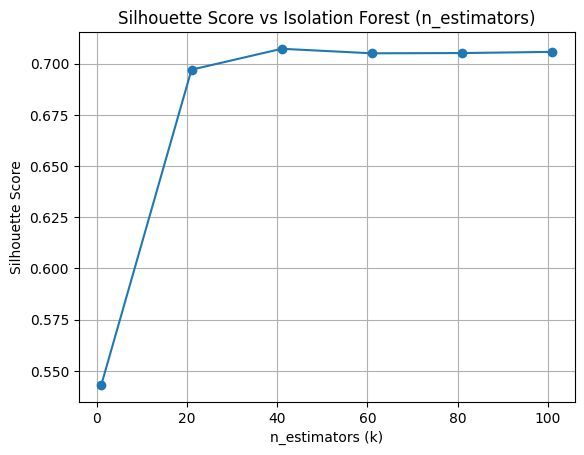

In [ ]:
'''
This function gets the best hyperparameter for n_estimators
'''

def silhouette_plots(X_scaled, k_range):
    scores = []
    for k in k_range:
        isolation_forest = IsolationForest(n_estimators= k,contamination=0.02, random_state=42)
        labels = isolation_forest.fit_predict(X_scaled)
        score = silhouette_score(X_scaled, labels)
        scores.append(score)
    return k_range, scores

k_range = range(1, 120,20)
k_values, silhouette_scores = silhouette_plots(X_scaled, k_range)
for k, score in zip(k_values, silhouette_scores):
    print(f"n_estimators = {k} → silhouette score = {score:.4f}")

plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('n_estimators (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Isolation Forest (n_estimators)')
plt.grid(True)
plt.show()


n_estimators = 40 → calinski_harabasz_score = 1093.0523
n_estimators = 50 → calinski_harabasz_score = 1010.3120
n_estimators = 60 → calinski_harabasz_score = 1023.5737
n_estimators = 70 → calinski_harabasz_score = 995.5634
n_estimators = 80 → calinski_harabasz_score = 1023.6975
n_estimators = 90 → calinski_harabasz_score = 993.1566
n_estimators = 100 → calinski_harabasz_score = 1057.3719


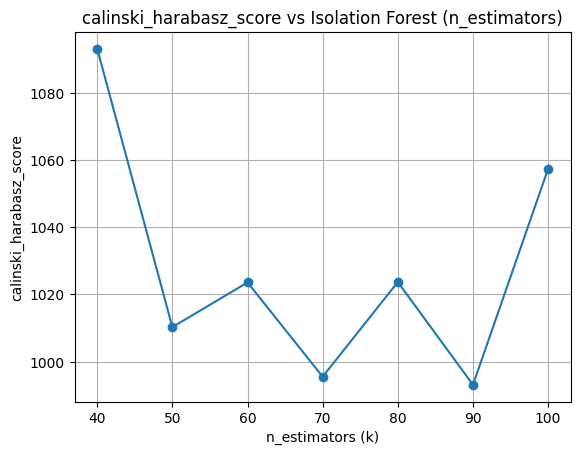

In [ ]:
'''
calinski_harabasz_score
'''

def silhouette_plots(X_scaled, k_range):
    scores = []
    for k in k_range:
        isolation_forest = IsolationForest(n_estimators= k,contamination=0.02, random_state=42)
        labels = isolation_forest.fit_predict(X_scaled)
        score = metrics.calinski_harabasz_score(X_scaled, labels)
        scores.append(score)
    return k_range, scores

k_range = range(40, 101,10)
k_values, silhouette_scores = silhouette_plots(X_scaled, k_range)
for k, score in zip(k_values, silhouette_scores):
    print(f"n_estimators = {k} → calinski_harabasz_score = {score:.4f}")

plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('n_estimators (k)')
plt.ylabel('calinski_harabasz_score')
plt.title('calinski_harabasz_score vs Isolation Forest (n_estimators)')
plt.grid(True)
plt.show()


**Local Outlier Factor**

In [ ]:
lof = LocalOutlierFactor(n_neighbors=90, contamination= 0.01)
df = df.with_columns(
    lof_label=pl.Series(lof.fit_predict(X_scaled)),
    lof_score=pl.Series(lof.negative_outlier_factor_)
)

n_neighbors = 40 → silhouette score = 0.1046
n_neighbors = 50 → silhouette score = -0.1617
n_neighbors = 60 → silhouette score = 0.0404
n_neighbors = 70 → silhouette score = 0.1538
n_neighbors = 80 → silhouette score = 0.3808
n_neighbors = 90 → silhouette score = 0.4790
n_neighbors = 100 → silhouette score = 0.4871


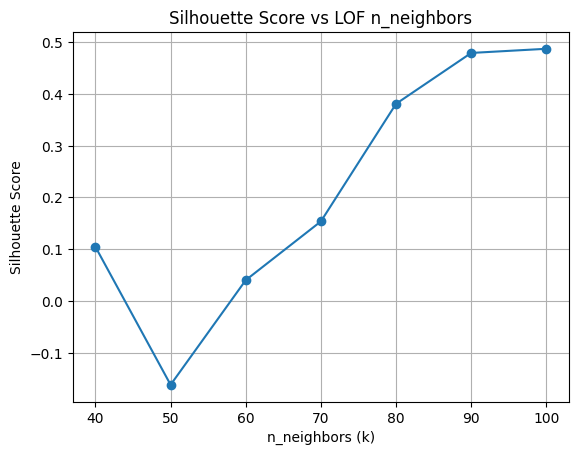

In [ ]:
def silhouette_plots(X_scaled, k_range):
    scores = []
    for k in k_range:
        lof = LocalOutlierFactor(n_neighbors=k, contamination=0.01)
        labels = lof.fit_predict(X_scaled)
        score = silhouette_score(X_scaled, labels)
        scores.append(score)
    return k_range, scores


k_range = range(40, 101,10)
k_values, silhouette_scores = silhouette_plots(X_scaled, k_range)
for k, score in zip(k_values, silhouette_scores):
    print(f"n_neighbors = {k} → silhouette score = {score:.4f}")




plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('n_neighbors (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs LOF n_neighbors')
plt.grid(True)
plt.show()


**One-Class SVM**

In [ ]:
ocsvm = OneClassSVM(nu=0.02, kernel="rbf", gamma='auto')   # {'rbf', 'poly', 'sigmoid', 'precomputed', 'linear'}
ocsvm.fit(X_scaled)

#include 2 new cols in df
df = df.with_columns(
    ocsvm_label=pl.Series(ocsvm.predict(X_scaled)),
    ocsvm_score=pl.Series(ocsvm.decision_function(X_scaled))
)


**DBSCAN - Density Based Spatial Clustering Of Applications With Noise**

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

dbscan = DBSCAN(eps=0.3, min_samples=10)
labels = dbscan.fit_predict(X_pca)

core_indices = dbscan.core_sample_indices_
core_points = X_pca[core_indices]
dist_to_core = pairwise_distances(X_pca, core_points).min(axis=1)
df = df.with_columns([
    pl.Series(name="dbscan_label", values=labels),
    pl.Series(name="dbscan_score", values=dist_to_core),

])

df = df.with_columns([
    pl.when(pl.col("dbscan_label") == -1).then(-1).otherwise(1).alias("dbscan_label")
])


In [ ]:
df.head(2)

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_type_encoded,brand_encoded,anomaly_score,anomaly_label,lof_label,lof_score,ocsvm_label,ocsvm_score,dbscan_label,dbscan_score
datetime[μs],str,i64,i64,str,str,f64,i64,str,i64,i64,f64,i64,i64,f64,i64,f64,i32,f64
null,"""view""",43600025,2102305967893905931,null,"""sony""",141.32,512682492,"""744e1990-27ba-477a-9189-e01eaf…",2,549,0.23393,1,1,-2.426913,1,0.686161,1,0.0
null,"""view""",1004767,2053013555631882655,"""electronics.smartphone""","""samsung""",246.52,551416853,"""0267b49d-40fe-40f2-9f7e-588527…",2,525,0.2478,1,1,-0.990321,1,0.717682,1,0.0


# **Evaluation Metrics**

**# Silhouette Score : This score measure the closeness of points in the same cluster**

**# Calinski-Harabasz Index : The Calinski-Harabasz index also known as the Variance Ratio Criterion, is the ratio of the sum of between-clusters dispersion and of inter-cluster dispersion for all clusters**

**# Davies-Bouldin Index : This index signifies the average 'similarity'between clusters, where the similarity is a measure that compares the distance between clusters with the size of the clusters themselves**









In [ ]:
from sklearn import metrics
labels = isolation_forest.fit_predict(X_scaled)
score = silhouette_score(X_scaled, labels)
print(f"Silhouette_score: iforest {score:.2f}")
print(f"davies_bouldin_score:  iforest {davies_bouldin_score(X_scaled, labels):.2f}")
print(f"Calinski-Harabasz Index:  iforest {metrics.calinski_harabasz_score(X_scaled, labels):.2f}")


Silhouette_score: iforest 0.67
davies_bouldin_score:  iforest 1.23
Calinski-Harabasz Index:  iforest 1492.55


 do the shilouette score for each of the algorithms and show the clusters


**Best Performance Silhouette Score**

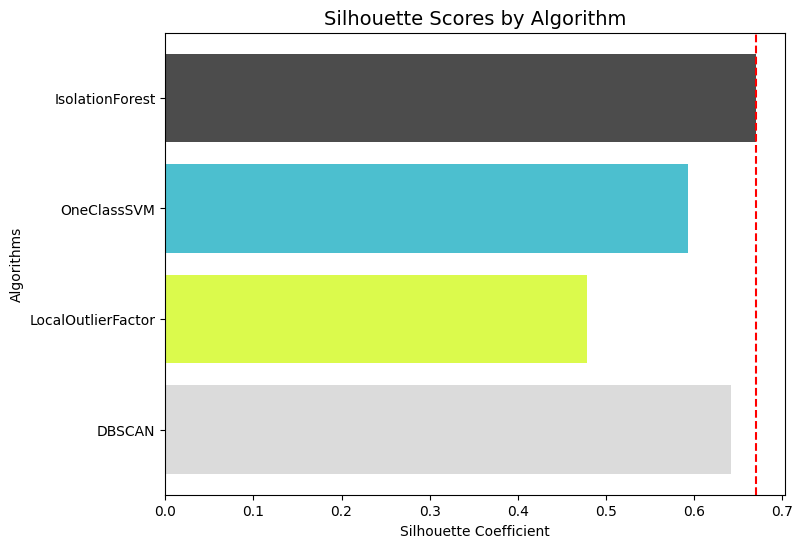

In [ ]:
def silhouette_plots(X_scaled, X_pca):
    scores = {}

    # Fit and score Isolation Forest
    iso = IsolationForest(n_estimators=10, contamination=0.05, random_state=42)
    labels = iso.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    scores['IsolationForest'] = score

    # Fit and score One-Class SVM
    ocsvm = OneClassSVM(nu=0.02, kernel="rbf", gamma='auto')
    labels = ocsvm.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    scores['OneClassSVM'] = score

    # Fit and score Local Outlier Factor
    lof = LocalOutlierFactor(n_neighbors=90, contamination= 0.01)
    labels = lof.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    scores['LocalOutlierFactor'] = score

    # Fit and score DBSCAN on PCA-transformed data
    dbscan = DBSCAN(eps=0.3, min_samples=10)
    labels = dbscan.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    scores['DBSCAN'] = score



    # Plot: Horizontal silhouette-style bars
    fig, ax1 = plt.subplots(figsize=(8, 6))



    n_algorithms = len(scores)
    algorithms = list(scores.keys())
    values = list(scores.values())
    colors = cm.nipy_spectral(np.linspace(0, 1, n_algorithms))

    y_pos = np.arange(n_algorithms)

    ax1.barh(y_pos, values, color=colors, alpha=0.7)
    ax1.set_yticks(y_pos)
    ax1.set_yticklabels(algorithms)
    ax1.invert_yaxis()  # Highest score on top



    ax1.set_title("Silhouette Scores by Algorithm", fontsize=14)
    ax1.set_xlabel("Silhouette Coefficient")
    ax1.set_ylabel("Algorithms")
    ax1.axvline(x = max(scores.values()), color="red", linestyle="--", label="Best Score")

    plt.show()

    return scores

silhouette_chart = silhouette_plots(X_scaled, X_pca)

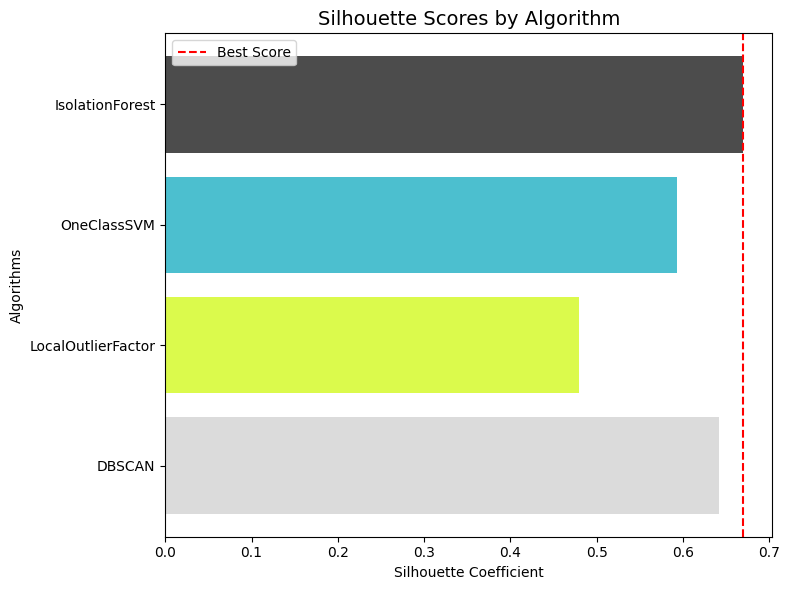

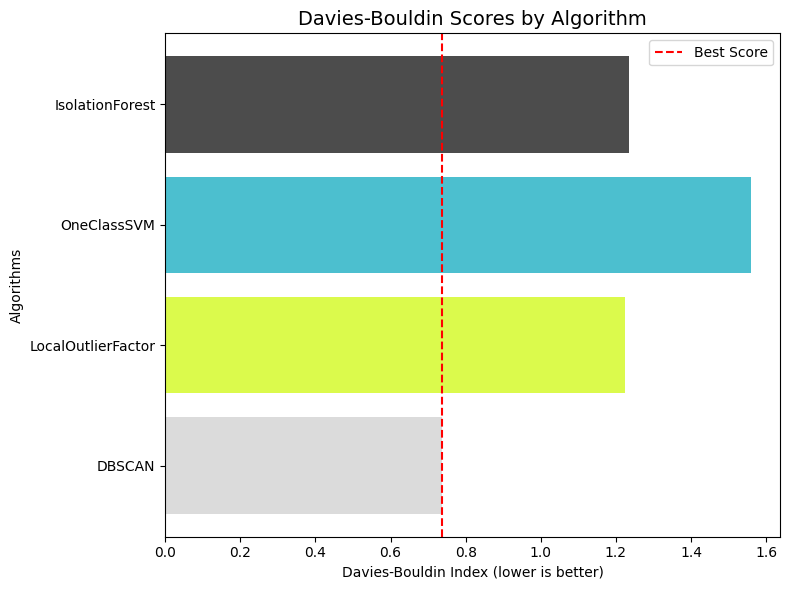

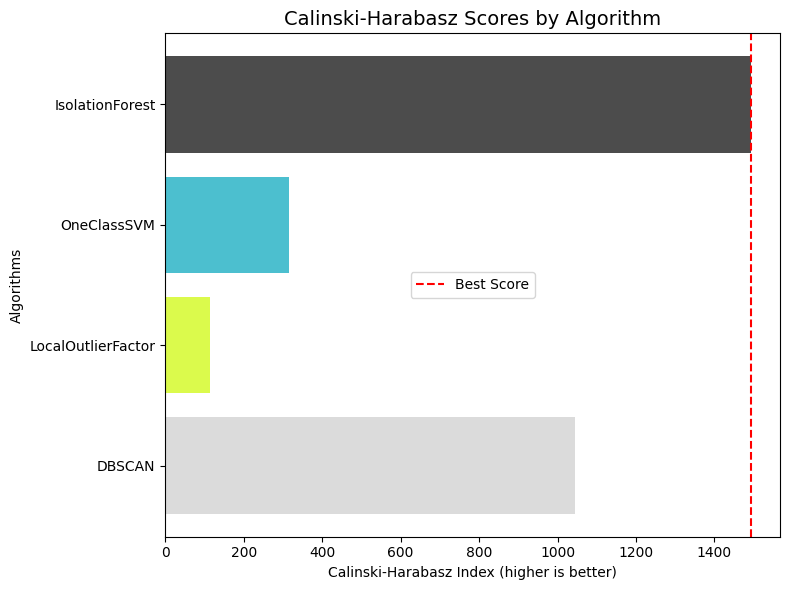

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm


def evaluation_scores(X_scaled, X_pca):
    silhouette_scores = {}
    db_scores = {}
    ch_scores = {}

    # Helper function to check if labels are usable (more than one cluster)
    def is_valid(labels):
        return len(set(labels)) > 1 and not all(label == -1 for label in labels)

    # Isolation Forest
    iso = IsolationForest(n_estimators=10, contamination=0.05, random_state=42)
    labels = iso.fit_predict(X_scaled)
    if is_valid(labels):
        silhouette_scores['IsolationForest'] = silhouette_score(X_scaled, labels)
        db_scores['IsolationForest'] = davies_bouldin_score(X_scaled, labels)
        ch_scores['IsolationForest'] = calinski_harabasz_score(X_scaled, labels)

    # One-Class SVM
    ocsvm = OneClassSVM(nu=0.02, kernel="rbf", gamma='auto')
    labels = ocsvm.fit_predict(X_scaled)
    if is_valid(labels):
        silhouette_scores['OneClassSVM'] = silhouette_score(X_scaled, labels)
        db_scores['OneClassSVM'] = davies_bouldin_score(X_scaled, labels)
        ch_scores['OneClassSVM'] = calinski_harabasz_score(X_scaled, labels)

    # Local Outlier Factor
    lof = LocalOutlierFactor(n_neighbors=90, contamination=0.01)
    labels = lof.fit_predict(X_scaled)
    if is_valid(labels):
        silhouette_scores['LocalOutlierFactor'] = silhouette_score(X_scaled, labels)
        db_scores['LocalOutlierFactor'] = davies_bouldin_score(X_scaled, labels)
        ch_scores['LocalOutlierFactor'] = calinski_harabasz_score(X_scaled, labels)

    # DBSCAN on PCA-transformed data
    dbscan = DBSCAN(eps=0.3, min_samples=10)
    labels = dbscan.fit_predict(X_pca)
    if is_valid(labels):
        silhouette_scores['DBSCAN'] = silhouette_score(X_pca, labels)
        db_scores['DBSCAN'] = davies_bouldin_score(X_pca, labels)
        ch_scores['DBSCAN'] = calinski_harabasz_score(X_pca, labels)

    # Plotting
    def plot_scores(scores, title, xlabel):
        fig, ax = plt.subplots(figsize=(8, 6))
        algorithms = list(scores.keys())
        values = list(scores.values())
        y_pos = np.arange(len(algorithms))
        colors = cm.nipy_spectral(np.linspace(0, 1, len(algorithms)))
        ax.barh(y_pos, values, color=colors, alpha=0.7)
        ax.set_yticks(y_pos)
        ax.set_yticklabels(algorithms)
        ax.invert_yaxis()
        ax.set_title(title, fontsize=14)
        ax.set_xlabel(xlabel)
        ax.set_ylabel("Algorithms")
        best_val = max(values) if 'Silhouette' in title or 'Calinski' in title else min(values)
        ax.axvline(x=best_val, color="red", linestyle="--", label="Best Score")
        ax.legend()
        plt.tight_layout()
        plt.show()

    plot_scores(silhouette_scores, "Silhouette Scores by Algorithm", "Silhouette Coefficient")
    plot_scores(db_scores, "Davies-Bouldin Scores by Algorithm", "Davies-Bouldin Index (lower is better)")
    plot_scores(ch_scores, "Calinski-Harabasz Scores by Algorithm", "Calinski-Harabasz Index (higher is better)")

    return {
        "silhouette": silhouette_scores,
        "davies_bouldin": db_scores,
        "calinski_harabasz": ch_scores
    }


# Call function
scores = evaluation_scores(X_scaled, X_pca)


In [ ]:

labels = lof.fit_predict(X_scaled)
score = silhouette_score(X_scaled, labels)
print(f"Silhouette_score: lof {score:.2f}")
print(f"davies_bouldin_score: lof {davies_bouldin_score(X_scaled, labels) :.2f}")
print(f"Calinski-Harabasz Index: lof {metrics.calinski_harabasz_score(X_scaled, labels) :.2f}")


Silhouette_score: lof 0.48
davies_bouldin_score: lof 1.23
Calinski-Harabasz Index: lof 112.85


In [ ]:

labels = ocsvm.fit_predict(X_scaled)
score = silhouette_score(X_scaled, labels)
print(f"Silhouette_score: ocsvm {score :.2f}")
print(f"davies_bouldin_score: ocsvm {davies_bouldin_score(X_scaled, labels) :.2f}")
print(f"Calinski-Harabasz Index: ocsvm {metrics.calinski_harabasz_score(X_scaled, labels) :.2f}")


Silhouette_score: ocsvm 0.59
davies_bouldin_score: ocsvm 1.56
Calinski-Harabasz Index: ocsvm 315.09


In [ ]:
labels = dbscan.fit_predict(X_pca)
score = silhouette_score(X_pca,labels)
davies_bouldin_score(X_pca,labels)
print(f"Silhouette_score: dbscan{score :.2f}")
print(f"davies_bouldin_score: dbscan {davies_bouldin_score(X_pca,labels) :.2f}")
print(f"Calinski-Harabasz Index: dbscan {metrics.calinski_harabasz_score(X_pca,labels) :.2f}")


Silhouette_score: dbscan0.64
davies_bouldin_score: dbscan 0.74
Calinski-Harabasz Index: dbscan 1043.73


*I tested 3 unsupervised models. To measure how well each one separates anomalies from normal behavior, we used the Silhouette Score. OCSVM gave us the strongest separation with a score of 0.68, which means it clustered the points well. Isolation Forest performed decently, while LOF had a much weaker score, indicating poor separation*

# Visualization

In [ ]:
# for easy visualization
df_viz = df.to_pandas()

In [ ]:

sanity_check = df_viz[[
    "event_type", "brand", "price",
    "anomaly_label", "lof_label", "ocsvm_label","anomaly_score","lof_score","ocsvm_score", "dbscan_score","dbscan_label"
]]

sanity_check

,event_type,brand,price,anomaly_label,lof_label,ocsvm_label,anomaly_score,lof_score,ocsvm_score,dbscan_score,dbscan_label
0,view,sony,141.32,1,1,1,0.233930,-2.426913,0.686161,0.0,1
1,view,samsung,246.52,1,1,1,0.247800,-0.990321,0.717682,0.0,1
2,view,thermex,115.75,1,1,1,0.211857,-1.100445,0.625861,0.0,1
3,view,samsung,603.36,1,1,1,0.152000,-1.032103,0.338551,0.0,1
4,view,None,167.06,1,1,1,0.227861,-1.010652,0.422217,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,view,apple,1352.67,1,1,1,0.022073,-1.256395,0.038312,0.0,1
4996,cart,huawei,164.98,-1,1,1,-0.113998,-0.996169,0.578509,0.0,1
4997,view,respect,82.63,1,1,1,0.225884,-1.029285,0.520387,0.0,1
4998,view,xiaomi,213.27,1,1,1,0.227906,-0.994643,0.526653,0.0,1


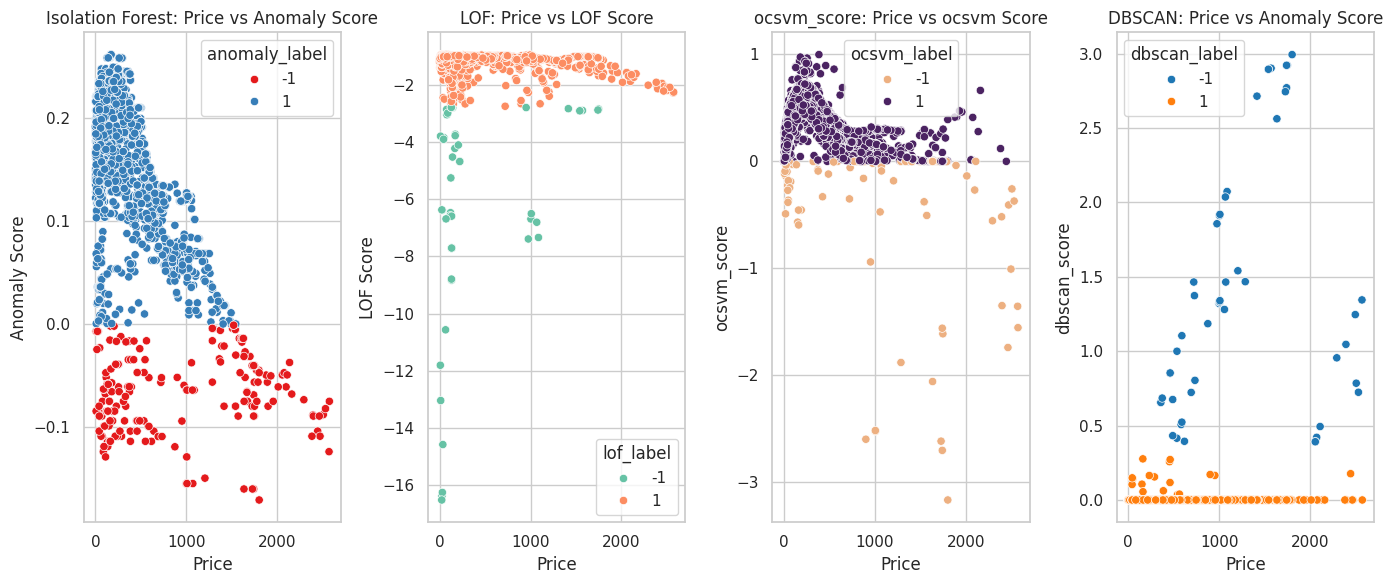

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Plot 1: Scatter plot of price vs anomaly scores
plt.figure(figsize=(14, 6))

# Isolation Forest
plt.subplot(1, 4, 1)
sns.scatterplot(x=df_viz["price"], y=df_viz["anomaly_score"], hue=df_viz["anomaly_label"], palette="Set1")
plt.title("Isolation Forest: Price vs Anomaly Score")
plt.xlabel("Price")
plt.ylabel("Anomaly Score")

# LOF
plt.subplot(1, 4, 2)
sns.scatterplot(x=df_viz["price"], y=df_viz["lof_score"], hue=df_viz["lof_label"], palette="Set2")
plt.title("LOF: Price vs LOF Score")
plt.xlabel("Price")
plt.ylabel("LOF Score")


#ocsvm
plt.subplot(1, 4, 3)
sns.scatterplot(x=df_viz["price"], y=df_viz["ocsvm_score"], hue=df_viz["ocsvm_label"], palette="flare")
plt.title("ocsvm_score: Price vs ocsvm Score")
plt.xlabel("Price")
plt.ylabel("ocsvm_score")

#dbscan
plt.subplot(1,4,4)
sns.scatterplot(data=df_viz, x="price",y="dbscan_score", hue=(df_viz["dbscan_label"]), palette="tab10")
plt.title("DBSCAN: Price vs Anomaly Score")
plt.xlabel("Price")
plt.ylabel("dbscan_score")



plt.tight_layout()
plt.show()




# **Reference**



“2.3. Clustering,” Scikit-learn. Available: https://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation

Datadog, “Detecting outliers and anomalies in realtime at Datadog - Homin Lee (OSCON Austin 2016),” YouTube. Jun. 13, 2016. Available: https://www.youtube.com/watch?v=mG4ZpEhRKHA


SigAi OC, “Anomaly Detection in Time Series: From Statistical Measures to DBSCAN clustering,” YouTube. Jan. 05, 2024. Available: https://www.youtube.com/watch?v=fmJiIQ5OVB4


Databricks. (2022, July 19). Auto Encoder Decoder-Based Anomaly Detection with the Lakehouse Paradigm [Video]. YouTube. https://www.youtube.com/watch?v=v8dzXskvF6c


M. Sv, “Davies-Bouldin Index for K-Means Clustering Evaluation in Python,” Towards Data Science, Mar. 05, 2025. Available: https://towardsdatascience.com/davies-bouldin-index-for-k-means-clustering-evaluation-in-python-57f66da15cd/



“Mastering the Davies-Bouldin Index for clustering model validation,” CodeSignal Learn. Available: https://codesignal.com/learn/courses/cluster-performance-unveiled/lessons/mastering-the-davies-bouldin-index-for-clustering-model-validation


H. Wei, “How to measure clustering performances when there are no ground truth?,” Medium, Dec. 13, 2021. Available: https://medium.com/@haataa/how-to-measure-clustering-performances-when-there-are-no-ground-truth-db027e9a871c




Transaction data simulator — Reproducible Machine Learning for Credit Card Fraud detection - Practical handbook. (n.d.). https://fraud-detection-handbook.github.io/fraud-detection-handbook/Chapter_3_GettingStarted/SimulatedDataset.html

# **Visualizations**

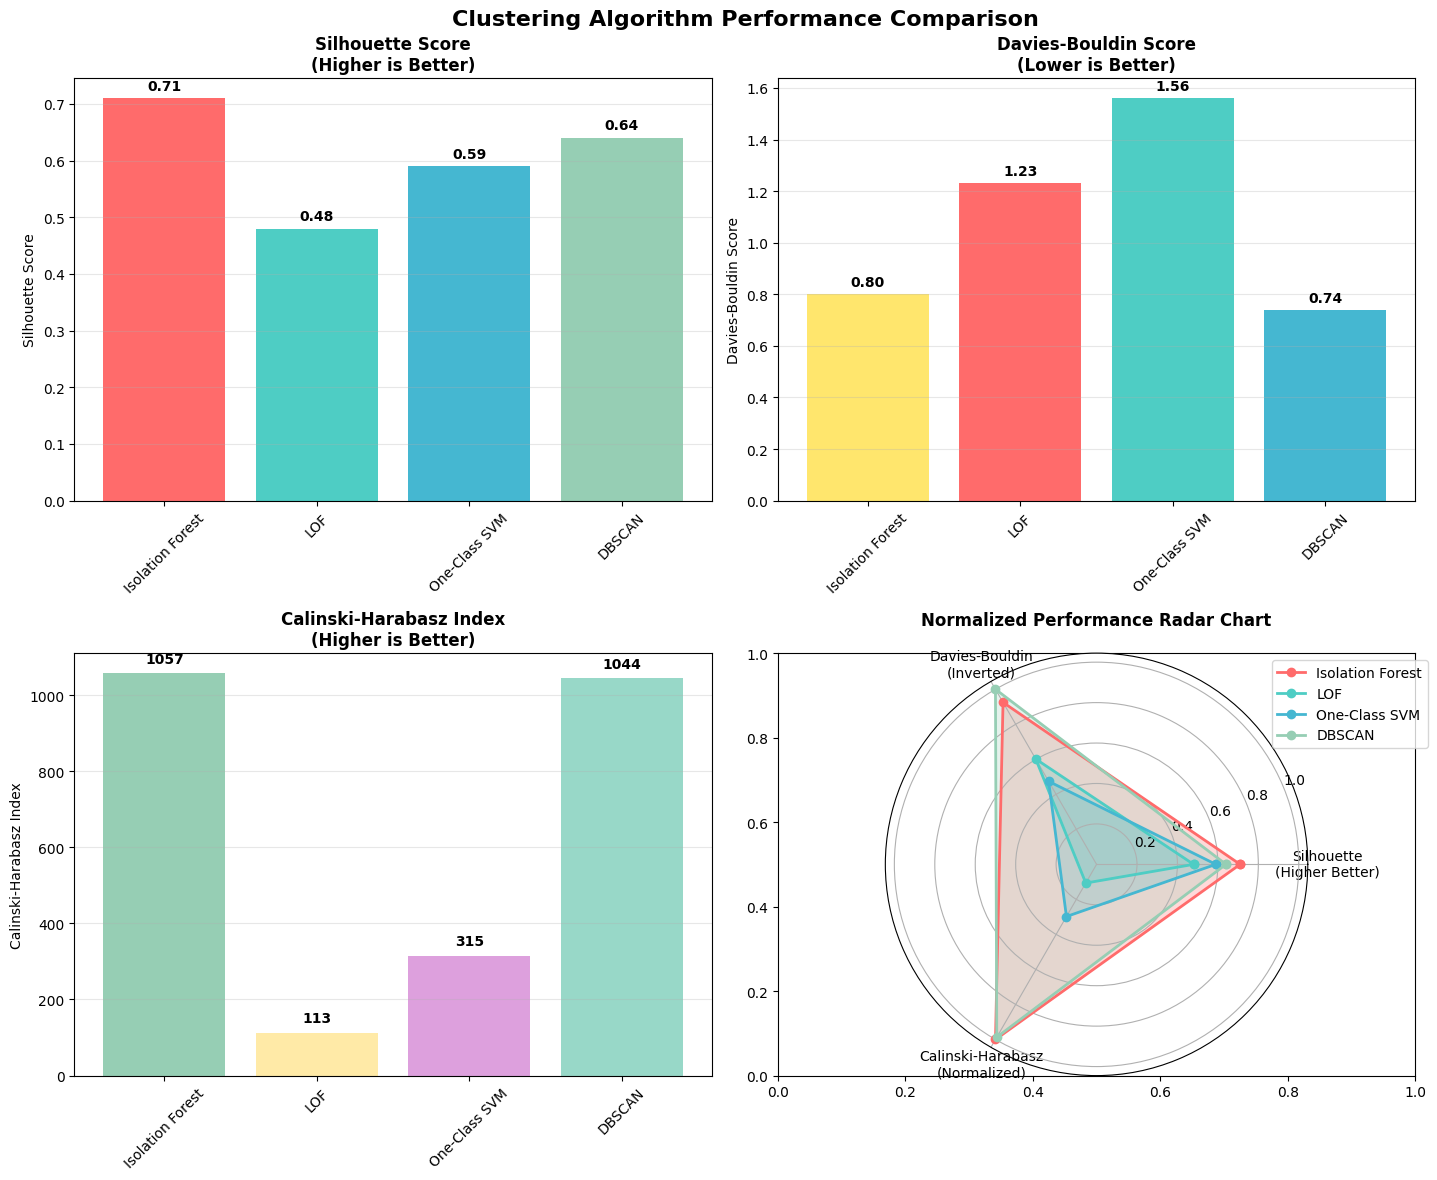


CLUSTERING ALGORITHM PERFORMANCE SUMMARY
Algorithm            Silhouette   Davies-Bouldin  Calinski-Harabasz 
------------------------------------------------------------
Isolation Forest     0.71         0.80            1057              
LOF                  0.48         1.23            113               
One-Class SVM        0.59         1.56            315               
DBSCAN               0.64         0.74            1044              

INTERPRETATION:
• Silhouette Score: Higher values (closer to 1) indicate better clustering
• Davies-Bouldin Score: Lower values indicate better clustering
• Calinski-Harabasz Index: Higher values indicate better clustering

BEST PERFORMERS:
• Best Silhouette Score: Isolation Forest
• Best Davies-Bouldin Score: DBSCAN
• Best Calinski-Harabasz Index: Isolation Forest


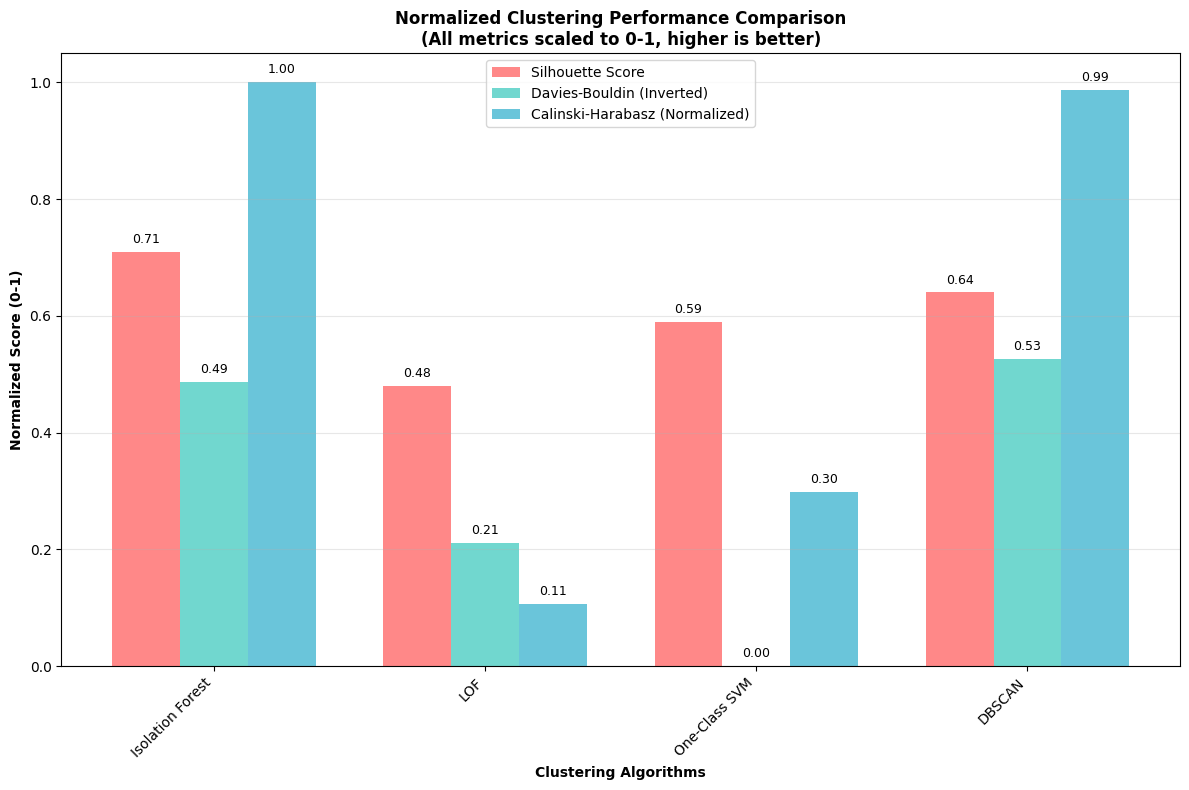

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Data from your clustering evaluation
data = {
    'Algorithm': ['Isolation Forest', 'LOF', 'One-Class SVM', 'DBSCAN'],
    'Silhouette_Score': [0.71, 0.48, 0.59, 0.64],
    'Davies_Bouldin_Score': [0.80, 1.23, 1.56, 0.74],
    'Calinski_Harabasz_Index': [1057.37, 112.85, 315.09, 1043.73]
}

df = pd.DataFrame(data)

# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Clustering Algorithm Performance Comparison', fontsize=16, fontweight='bold')

# 1. Silhouette Score Comparison (Bar Chart)
axes[0, 0].bar(df['Algorithm'], df['Silhouette_Score'], color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
axes[0, 0].set_title('Silhouette Score\n(Higher is Better)', fontweight='bold')
axes[0, 0].set_ylabel('Silhouette Score')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', alpha=0.3)
for i, v in enumerate(df['Silhouette_Score']):
    axes[0, 0].text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom', fontweight='bold')

# 2. Davies-Bouldin Score Comparison (Bar Chart)
axes[0, 1].bar(df['Algorithm'], df['Davies_Bouldin_Score'], color=['#FFE66D', '#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[0, 1].set_title('Davies-Bouldin Score\n(Lower is Better)', fontweight='bold')
axes[0, 1].set_ylabel('Davies-Bouldin Score')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', alpha=0.3)
for i, v in enumerate(df['Davies_Bouldin_Score']):
    axes[0, 1].text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom', fontweight='bold')

# 3. Calinski-Harabasz Index Comparison (Bar Chart)
axes[1, 0].bar(df['Algorithm'], df['Calinski_Harabasz_Index'], color=['#96CEB4', '#FFEAA7', '#DDA0DD', '#98D8C8'])
axes[1, 0].set_title('Calinski-Harabasz Index\n(Higher is Better)', fontweight='bold')
axes[1, 0].set_ylabel('Calinski-Harabasz Index')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y', alpha=0.3)
for i, v in enumerate(df['Calinski_Harabasz_Index']):
    axes[1, 0].text(i, v + 20, f'{v:.0f}', ha='center', va='bottom', fontweight='bold')

# 4. Normalized Radar Chart for all metrics
# Normalize the metrics for better comparison
df_norm = df.copy()
# For Silhouette Score (0-1, higher better) - no change needed
df_norm['Silhouette_Score_norm'] = df['Silhouette_Score']
# For Davies-Bouldin (lower better) - invert by taking 1/value and normalize
df_norm['Davies_Bouldin_Score_norm'] = (1/df['Davies_Bouldin_Score']) / (1/df['Davies_Bouldin_Score']).max()
# For Calinski-Harabasz (higher better) - normalize to 0-1
df_norm['Calinski_Harabasz_Index_norm'] = df['Calinski_Harabasz_Index'] / df['Calinski_Harabasz_Index'].max()

# Create radar chart
angles = np.linspace(0, 2*np.pi, 3, endpoint=False).tolist()
angles += angles[:1]  # Complete the circle

ax_radar = plt.subplot(2, 2, 4, projection='polar')
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']

for i, alg in enumerate(df['Algorithm']):
    values = [
        df_norm.iloc[i]['Silhouette_Score_norm'],
        df_norm.iloc[i]['Davies_Bouldin_Score_norm'],
        df_norm.iloc[i]['Calinski_Harabasz_Index_norm']
    ]
    values += values[:1]  # Complete the circle

    ax_radar.plot(angles, values, 'o-', linewidth=2, label=alg, color=colors[i])
    ax_radar.fill(angles, values, alpha=0.25, color=colors[i])

ax_radar.set_xticks(angles[:-1])
ax_radar.set_xticklabels(['Silhouette\n(Higher Better)', 'Davies-Bouldin\n(Inverted)', 'Calinski-Harabasz\n(Normalized)'])
ax_radar.set_title('Normalized Performance Radar Chart', fontweight='bold', pad=20)
ax_radar.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
ax_radar.grid(True)

plt.tight_layout()
plt.show()

# Create a summary table
print("\n" + "="*60)
print("CLUSTERING ALGORITHM PERFORMANCE SUMMARY")
print("="*60)
print(f"{'Algorithm':<20} {'Silhouette':<12} {'Davies-Bouldin':<15} {'Calinski-Harabasz':<18}")
print("-"*60)
for _, row in df.iterrows():
    print(f"{row['Algorithm']:<20} {row['Silhouette_Score']:<12.2f} {row['Davies_Bouldin_Score']:<15.2f} {row['Calinski_Harabasz_Index']:<18.0f}")

print("\n" + "="*60)
print("INTERPRETATION:")
print("• Silhouette Score: Higher values (closer to 1) indicate better clustering")
print("• Davies-Bouldin Score: Lower values indicate better clustering")
print("• Calinski-Harabasz Index: Higher values indicate better clustering")
print("="*60)

# Best performing algorithm analysis
best_silhouette = df.loc[df['Silhouette_Score'].idxmax(), 'Algorithm']
best_davies = df.loc[df['Davies_Bouldin_Score'].idxmin(), 'Algorithm']
best_calinski = df.loc[df['Calinski_Harabasz_Index'].idxmax(), 'Algorithm']

print(f"\nBEST PERFORMERS:")
print(f"• Best Silhouette Score: {best_silhouette}")
print(f"• Best Davies-Bouldin Score: {best_davies}")
print(f"• Best Calinski-Harabasz Index: {best_calinski}")

# Alternative: Create individual metric comparison plots
fig2, ax = plt.subplots(1, 1, figsize=(12, 8))

x = np.arange(len(df['Algorithm']))
width = 0.25

# Normalize all metrics to 0-1 scale for comparison
silhouette_norm = df['Silhouette_Score']
davies_norm = 1 - (df['Davies_Bouldin_Score'] / df['Davies_Bouldin_Score'].max())  # Invert Davies-Bouldin
calinski_norm = df['Calinski_Harabasz_Index'] / df['Calinski_Harabasz_Index'].max()

bars1 = ax.bar(x - width, silhouette_norm, width, label='Silhouette Score', color='#FF6B6B', alpha=0.8)
bars2 = ax.bar(x, davies_norm, width, label='Davies-Bouldin (Inverted)', color='#4ECDC4', alpha=0.8)
bars3 = ax.bar(x + width, calinski_norm, width, label='Calinski-Harabasz (Normalized)', color='#45B7D1', alpha=0.8)

ax.set_xlabel('Clustering Algorithms', fontweight='bold')
ax.set_ylabel('Normalized Score (0-1)', fontweight='bold')
ax.set_title('Normalized Clustering Performance Comparison\n(All metrics scaled to 0-1, higher is better)', fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(df['Algorithm'], rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()